In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.stats import norm

In [2]:
pad_name = [37,38,27,28]

In [3]:
scan_par = np.loadtxt(f'/home/evridiki/Desktop/JULY_RUNS/run_627_632_info/slew_fit.txt')
share_par = np.loadtxt(f'/home/evridiki/Desktop/JULY_RUNS/run_630_636_info/slew_fit.txt')

def double_expo(x,*p):
    return np.exp(p[0]*x+p[1])+np.exp(p[2]*x+p[3])+p[4]

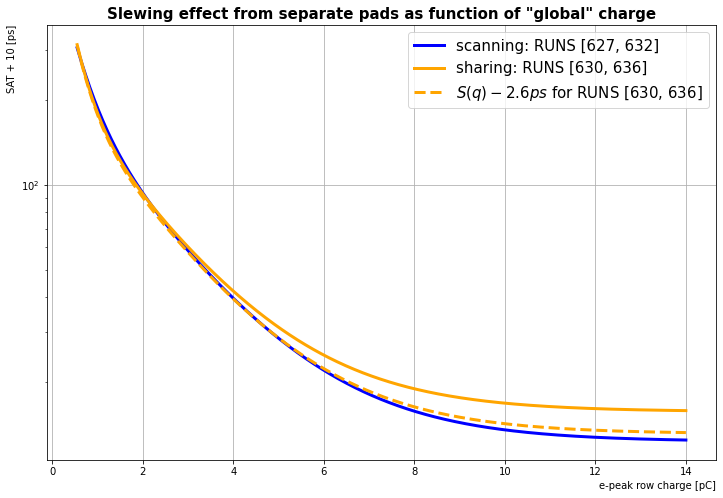

In [4]:
fig, ax = plt.subplots(figsize=(12,8))

x = np.linspace(0.55,14,1000)

plt.plot(x,double_expo(x,*scan_par),color='b',linewidth='3',label='scanning: RUNS [627, 632]')
plt.plot(x,double_expo(x,*share_par),color='orange',linewidth='3',label='sharing: RUNS [630, 636]')
plt.plot(x,double_expo(x,*share_par)-2.6,'--',color='orange',linewidth='3',
         label=r'$S(q)-2.6 ps$ for RUNS [630, 636]')
plt.yscale('log')
plt.title('Slewing effect from separate pads as function of "global" charge', fontsize=15, fontweight='bold')
plt.ylabel('SAT + 10 [ps]',loc ='top')
plt.xlabel('e-peak row charge [pC]', loc='right')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

In [5]:
cable_delay = np.loadtxt(f'/home/evridiki/Desktop/JULY_RUNS/run_627_632_info/cable_delay.txt')
pad_slew = []

for index in range(4):
    pad = index+1
    pad_slew.append(np.loadtxt(f'/home/evridiki/Desktop/JULY_RUNS/run_627_632_info/slew_pad{pad}.txt',
                        comments="#", delimiter=" ", unpack=False))
    
    
p2 = np.loadtxt('/home/evridiki/Desktop/JULY_RUNS/run_627_632_info/scale_par.txt',
                delimiter=" ", usecols=(0))
p3 = np.loadtxt('/home/evridiki/Desktop/JULY_RUNS/run_627_632_info/scale_par.txt',
                delimiter=" ", usecols=(1))

for index in range(4):
    pad_slew[index][:,3] =  pad_slew[index][:,3] - cable_delay[index]+10 # correctfor cables time delay+10 ps
    pad_slew[index][:,3] =  p2[index]*pad_slew[index][:,3]+p3[index]# scale charge of pads
    
#pad_slew[2][:,0] =  0.98*pad_slew[2][:,0]-0.12

scan_slew = np.concatenate([pad_slew[index][:-1,:] for index in range(4)])

scan_slew.shape

(168, 7)

In [6]:
cable_delay = np.loadtxt(f'/home/evridiki/Desktop/JULY_RUNS/run_630_636_info/cable_delay.txt')
pad_slew = []

for index in range(4):
    pad = index+1
    pad_slew.append(np.loadtxt(f'/home/evridiki/Desktop/JULY_RUNS/run_630_636_info/slew_pad{pad}.txt',
                        comments="#", delimiter=" ", unpack=False))
    

for index in range(4):
    pad_slew[index][:,3] =  pad_slew[index][:,3] - cable_delay[index]+10 # correctfor cables time delay+10 ps
    pad_slew[index][:,0] =  p2[index]*pad_slew[index][:,0]+p3[index]# scale charge of pads
    
#pad_slew[0][:,0] =  pad_slew[0][:,0]-0.15 # open when to see sharing  runs data
#pad_slew[2][:,0] =  0.98*pad_slew[2][:,0]-0.12

share_slew = np.concatenate([pad_slew[index][:-1,:] for index in range(4)])

share_slew.shape

(168, 7)

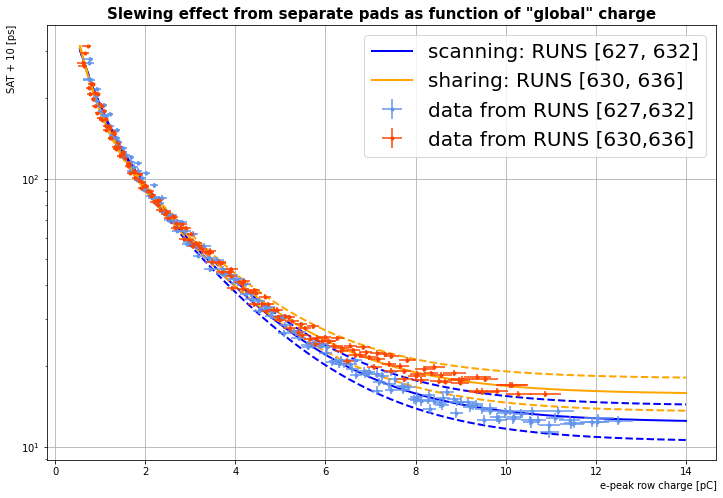

In [7]:
fig=plt.figure(figsize=(12,8))


y = double_expo(x,*scan_par)
plt.plot(x,y,color='b',linewidth='2',label='scanning: RUNS [627, 632]')
plt.plot(x,y+1.5*scan_slew[:-1,4].mean(),'--',color='b',linewidth='2')
plt.plot(x,y-1.5*scan_slew[:-1,4].mean(),'--',color='b',linewidth='2')

y = double_expo(x,*share_par)
plt.plot(x,y,color='orange',linewidth='2',label='sharing: RUNS [630, 636]')
plt.plot(x,y+1.9*share_slew[:-1,4].mean(),color='orange',linestyle='--',linewidth='2')
plt.plot(x,y-1.9*share_slew[:-1,4].mean(),color='orange',linestyle='--',linewidth='2')

plt.errorbar(scan_slew[:-1,0],scan_slew[:-1,3], yerr =scan_slew[:-1,4],label='data from RUNS [627,632]',
             xerr=[scan_slew[:-1,1],scan_slew[:-1,2]],fmt='o', color = 'cornflowerblue', markersize=3. )
plt.errorbar(share_slew[:-1,0],share_slew[:-1,3], yerr =share_slew[:-1,4],label='data from RUNS [630,636]',
             xerr=[share_slew[:-1,1],share_slew[:-1,2]],fmt='o', color = 'orangered', markersize=3. )

plt.yscale('log')
plt.title('Slewing effect from separate pads as function of "global" charge', fontsize=15, fontweight='bold')
plt.ylabel('SAT + 10 [ps]',loc ='top')
plt.xlabel('e-peak row charge [pC]', loc='right')
plt.legend(prop={'size': 20})
plt.grid()

plt.show()

In [8]:
share_slew[:-1,4].mean()

1.1805372430520424

In [9]:
scan_par = np.loadtxt(f'/home/evridiki/Desktop/JULY_RUNS/run_627_632_info/global_slew_fit.txt')
share_par = np.loadtxt(f'/home/evridiki/Desktop/JULY_RUNS/run_630_636_info/global_slew_fit.txt')

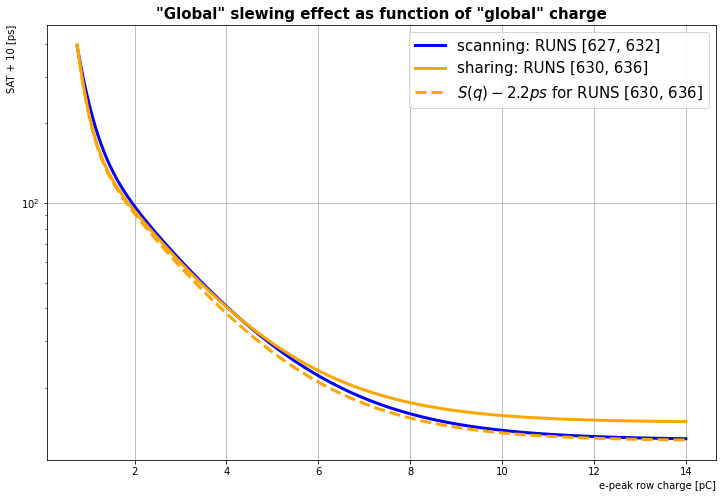

In [14]:
ig, ax = plt.subplots(figsize=(12,8))

x = np.linspace(0.75,14,1000)

plt.plot(x,double_expo(x,*scan_par),color='b',linewidth='3',label='scanning: RUNS [627, 632]')
plt.plot(x,double_expo(x,*share_par),color='orange',linewidth='3',label='sharing: RUNS [630, 636]')
plt.plot(x,double_expo(x,*share_par)-2.2,'--',color='orange',linewidth='3',
         label=r'$S(q)-2.2 ps$ for RUNS [630, 636]')
plt.yscale('log')
plt.title('"Global" slewing effect as function of "global" charge', fontsize=15, fontweight='bold')
plt.ylabel('SAT + 10 [ps]',loc ='top')
plt.xlabel('e-peak row charge [pC]', loc='right')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

In [15]:
scan_slew = np.loadtxt(f'/home/evridiki/Desktop/JULY_RUNS/run_627_632_info/slew_all_pads.txt',
                        comments="#", delimiter=" ", unpack=False)
share_slew = np.loadtxt(f'/home/evridiki/Desktop/JULY_RUNS/run_630_636_info/slew_all_pads.txt',
                        comments="#", delimiter=" ", unpack=False)


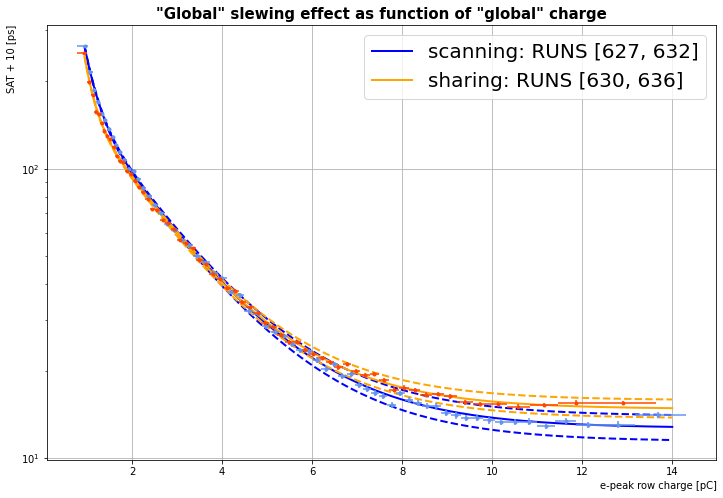

In [16]:
fig=plt.figure(figsize=(12,8))
x = np.linspace(scan_slew[0,0],14,1000)

y = double_expo(x,*scan_par)
plt.plot(x,y,color='b',linewidth='2',label='scanning: RUNS [627, 632]')
plt.plot(x,y+1.5*scan_slew[:-1,4].mean(),'--',color='b',linewidth='2')
plt.plot(x,y-1.5*scan_slew[:-1,4].mean(),'--',color='b',linewidth='2')

y = double_expo(x,*share_par)
plt.plot(x,y,color='orange',linewidth='2',label='sharing: RUNS [630, 636]')
plt.plot(x,y+1.5*share_slew[:-1,4].mean(),color='orange',linestyle='--',linewidth='2')
plt.plot(x,y-1.5*share_slew[:-1,4].mean(),color='orange',linestyle='--',linewidth='2')

plt.errorbar(scan_slew[:-1,0],scan_slew[:-1,3], yerr =scan_slew[:-1,4],
             xerr=[scan_slew[:-1,1],scan_slew[:-1,2]],fmt='o', color = 'cornflowerblue', markersize=3. )
plt.errorbar(share_slew[:-1,0],share_slew[:-1,3], yerr =share_slew[:-1,4],
             xerr=[share_slew[:-1,1],share_slew[:-1,2]],fmt='o', color = 'orangered', markersize=3. )

plt.yscale('log')
plt.title('"Global" slewing effect as function of "global" charge', fontsize=15, fontweight='bold')
plt.ylabel('SAT + 10 [ps]',loc ='top')
plt.xlabel('e-peak row charge [pC]', loc='right')
plt.legend(prop={'size': 20})
plt.grid()

#plt.ylim(70,150)
#plt.xlim(0,5)
plt.show()